### Importing Libraries

In [15]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics

from sklearn.model_selection import train_test_split
import scipy.stats as stats

In [16]:
df = pd.read_csv('data/housing.csv')

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [17]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


### Clearing Null Values and Duplicates

In [18]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [19]:
df.duplicated().sum()

0

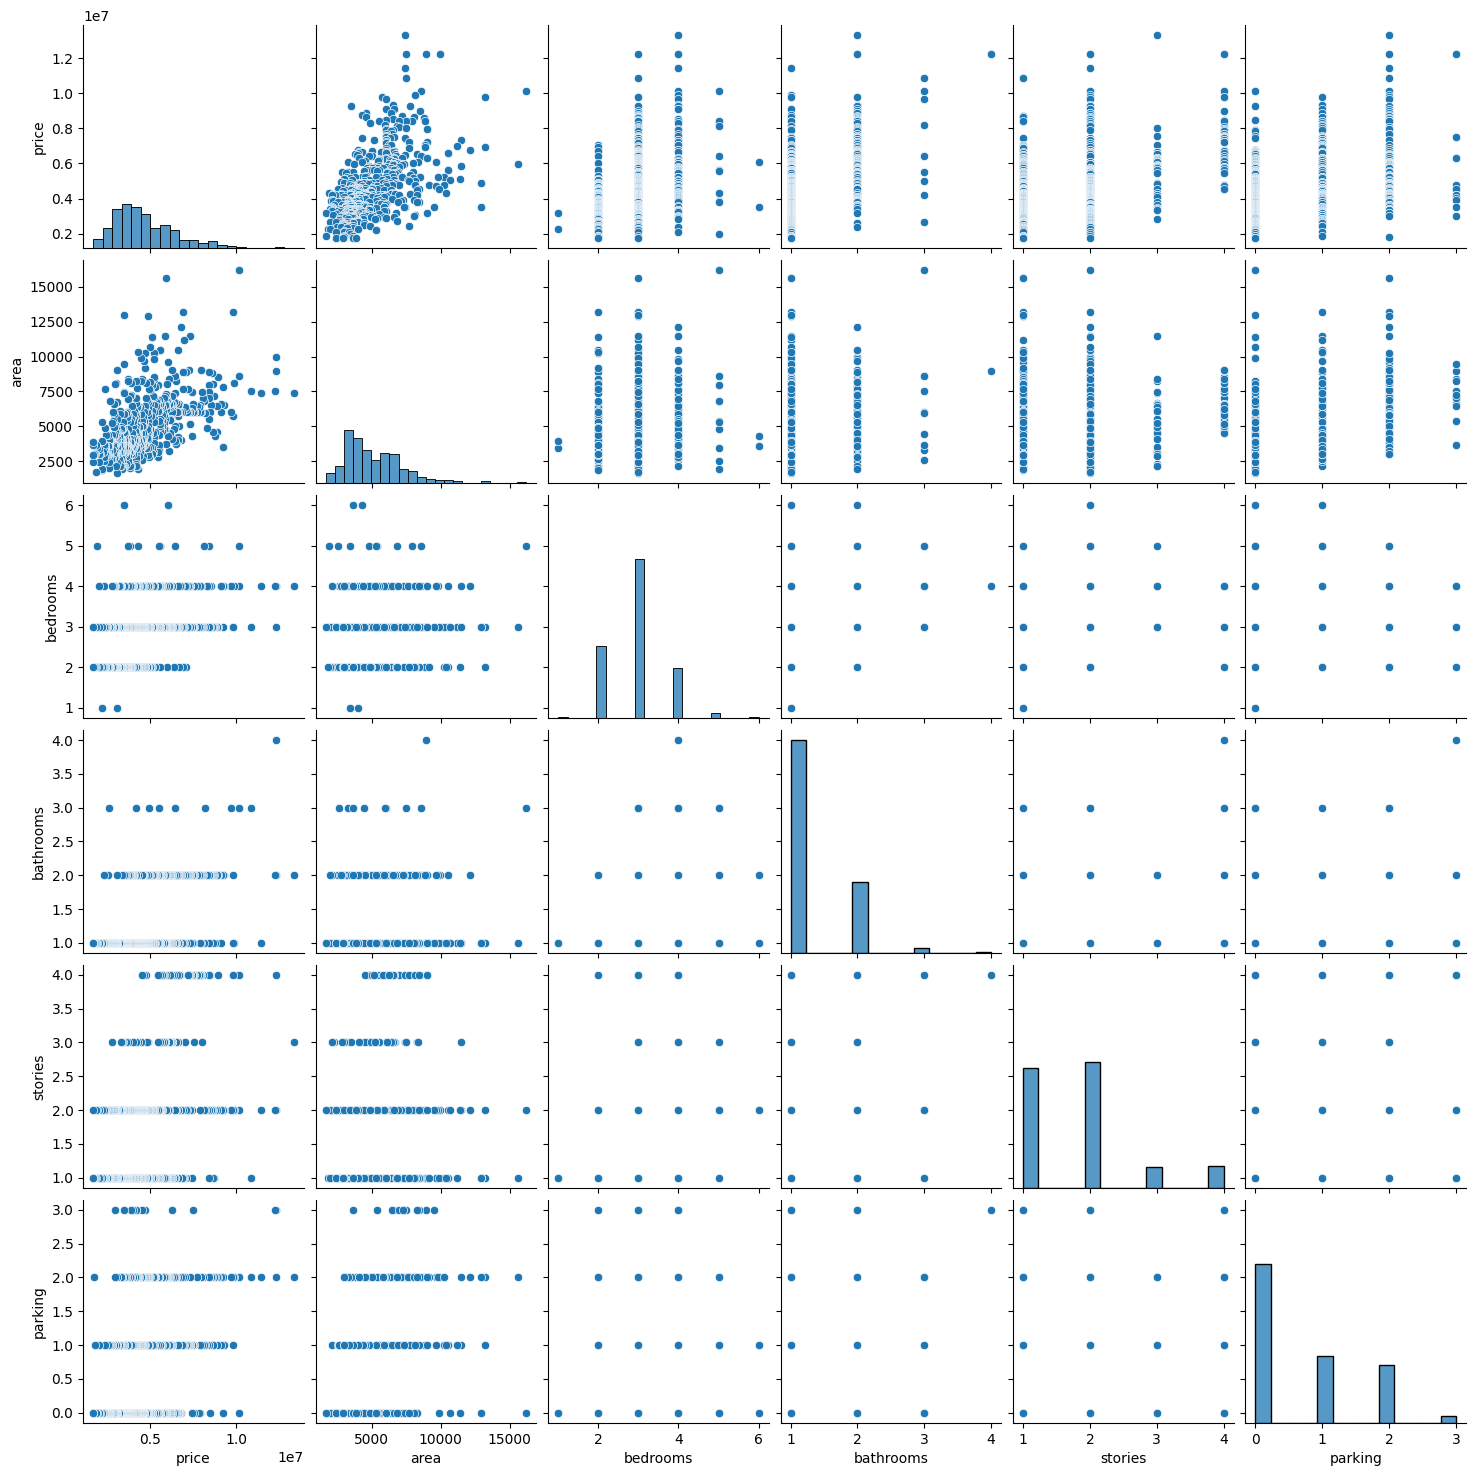

In [20]:
sns.pairplot(data=df)

### Rewriting Categorical Columns

In [21]:
#connected to mainroad
def binary_features(x):
    if x.lower() == 'yes':
        return 1
    else:
        return 0

df['main_road_connection'] = df['mainroad'].apply(binary_features)
df['has_guestroom'] = df['guestroom'].apply(binary_features)
df['has_basement'] = df['basement'].apply(binary_features)
df['has_hot_water'] = df['hotwaterheating'].apply(binary_features)
df['has_ac'] = df['airconditioning'].apply(binary_features)

#furnishing status
def furnishing_status_numerical(x):
    if x.lower() == 'furnished':
        return 2
    elif x.lower() == 'semi-furnished':
        return 1
    else:
        return 0

df['furnishing_grade'] = df['furnishingstatus'].apply(furnishing_status_numerical)
        

In [22]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,main_road_connection,has_guestroom,has_basement,has_hot_water,has_ac,furnishing_grade
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,1,0,0,0,1,2
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,1,0,0,0,1,2
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,1,0,1,0,0,1
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,1,0,1,0,1,2
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,1,1,1,0,1,2


### Finding Features that have a linear relationship with price

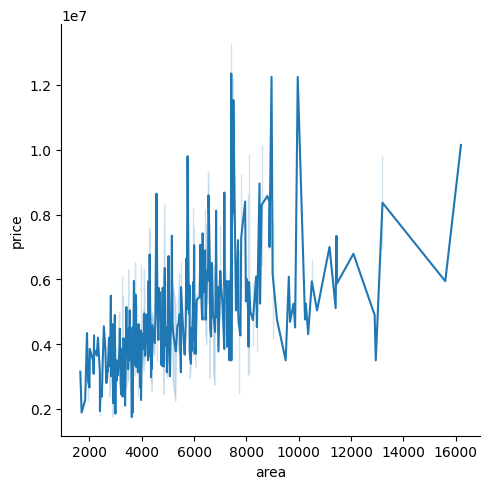

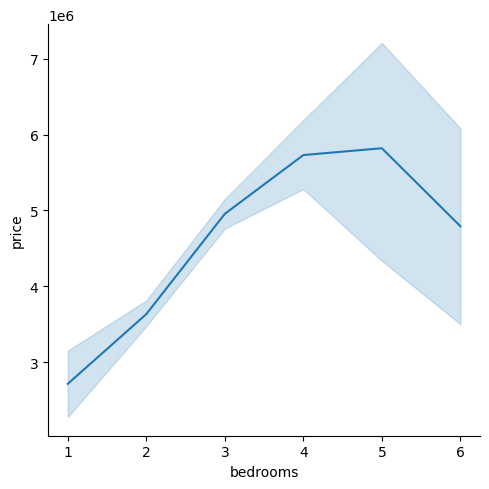

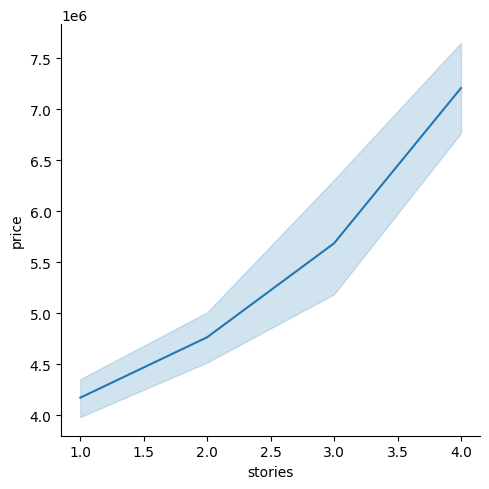

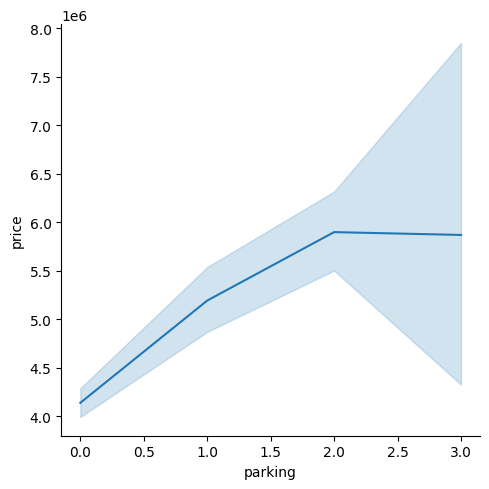

In [23]:
continuous_features = ['area', 'bedrooms', 'stories', 'parking']

for feature in continuous_features:
    sns.relplot(data = df, y = 'price', x = feature, kind = 'line')

### Feature Selection

In [24]:
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'main_road_connection', 'has_ac', 'furnishing_grade']

#removed features include has_guestroom, has_basement

In [25]:
target = ['price']

X = df[features].values
y = df[target].values

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [27]:
model = LinearRegression()

In [28]:
model.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred = model.predict(X_test)
y_pred

array([[7049226.46034409],
       [6590543.66209333],
       [7165633.36255807],
       [4681565.9414665 ],
       [4589874.63285736],
       [3249610.77183827],
       [2557217.55877174],
       [7173231.59180307],
       [2662712.69513568],
       [4881213.48449596],
       [3607703.49271453],
       [4047089.8842424 ],
       [4971644.22791712],
       [4992756.23735343],
       [5897030.85854235],
       [8023216.71073779],
       [4672649.61376913],
       [3854682.06206575],
       [5905842.2314323 ],
       [3002871.08009479],
       [3880727.29110307],
       [5724871.70343908],
       [5238240.05758598],
       [3104776.77526637],
       [5324753.69144954],
       [6032405.15074483],
       [3115800.00320189],
       [7534608.40844925],
       [7027201.30265782],
       [4121969.16692004],
       [7422626.43225577],
       [7042273.96061084],
       [4294226.90488585],
       [4414465.21301784],
       [6425292.56721792],
       [3465514.83591982],
       [5759033.47149032],
 

### Analyzing Metrics

In [30]:
r_squared = metrics.r2_score(y_test, y_pred)
print('R-Squared Score:', r_squared)

R-Squared Score: 0.6115934443885036


In [31]:
mae = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error: ', mae)

Mean Absolute Error:  927712.8562842851


### Analyzing Coefficients

In [32]:
coefficient_values = model.coef_

df_coefficients = pd.DataFrame(coefficient_values, columns = features).T
df_coefficients.columns = ['coefficient']

df_coefficients

,coefficient
area,2.521130e+02
bedrooms,1.801965e+05
bathrooms,1.139553e+06
stories,3.999466e+05
parking,2.765503e+05
main_road_connection,6.190896e+05
has_ac,6.985014e+05
furnishing_grade,2.590932e+05


In [33]:
df_preds = pd.DataFrame(y_pred, columns = ['predictions'])
df_preds['actual'] = y_test
df_preds['abs_error'] = abs(df_preds['predictions'] - df_preds['actual'])

df_preds.head(10)

,predictions,actual,abs_error
0,7.049226e+06,7070000,2.077354e+04
1,6.590544e+06,4550000,2.040544e+06
2,7.165633e+06,5600000,1.565633e+06
3,4.681566e+06,6125000,1.443434e+06
4,4.589875e+06,2940000,1.649875e+06
5,3.249611e+06,3780000,5.303892e+05
6,2.557218e+06,2450000,1.072176e+05
7,7.173232e+06,7490000,3.167684e+05
8,2.662713e+06,2940000,2.772873e+05
9,4.881213e+06,6440000,1.558787e+06


In [34]:
import pickle

filename = 'housing_price.pkl'

pickle.dump(model, open(filename, 'wb'))

### Using Lasso Regression over OLS

In [35]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [36]:
lasso = Lasso()

In [37]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

In [38]:
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='r2')

In [39]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'alpha': 1}
Best Score: 0.6158348622487952


### Using Ridge Regression over OLS

In [40]:
from sklearn.linear_model import Ridge

In [41]:
param_grid_rr = {'alpha': [0.01, 0.1, 1, 10, 100, 1000]}

In [43]:
ridge = Ridge()

In [49]:
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid_rr, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100, 1000]}, scoring='r2')

In [50]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'alpha': 1}
Best Score: 0.615911811992661


### Using ElasticNet

In [46]:
from sklearn.linear_model import ElasticNet

In [47]:
elastic = ElasticNet()

In [51]:
param_grid_en = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],
    'l1_ratio': [0.1, 0.5, 0.9]
}

In [52]:
grid_search = GridSearchCV(estimator=elastic, param_grid=param_grid_en, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10],
                         'l1_ratio': [0.1, 0.5, 0.9]},
             scoring='r2')

In [53]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'alpha': 0.01, 'l1_ratio': 0.5}
Best Score: 0.6159362586118962


Even using different types of linear models, our model's maximum score is a 0.62, which is still fairly inaccurate -- we can use a tree-based model instead, such as a random forest model